In [1]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
## import r2_score
import pandas as pd
from sklearn.metrics import r2_score

In [2]:
df_IC50 = pd.read_excel('../../GDSC2_dataset/GDSC2_fitted_dose_response_27Oct23.xlsx')
df_IC50['CL_drug'] = df_IC50['COSMIC_ID'].astype(str) + '_' + df_IC50['DRUG_ID'].astype(str)
df_curve = pd.read_csv('../../GDSC2_dataset/DRP_data/DRP_df.csv')
cell_meta = pd.read_csv('../../GDSC2_dataset/meta_data/cell_meta.csv')
LGG_cosmic = cell_meta[cell_meta.TCGA_DESC == 'LGG'].COSMIC_ID.unique()
BLCA_cosmic = cell_meta[cell_meta.TCGA_DESC == 'BLCA'].COSMIC_ID.unique()
LGG_df = df_IC50[df_IC50['COSMIC_ID'].isin(LGG_cosmic)]
BLCA_df = df_IC50[df_IC50['COSMIC_ID'].isin(BLCA_cosmic)]
BC_df = BLCA_df[BLCA_df.CELL_LINE_NAME == 'SW1710']
Gil_df = df_IC50[df_IC50.COSMIC_ID == 946367]
BC_curve_df = df_curve[df_curve.COSMIC_ID == 909749]
Gil_curve_df = df_curve[df_curve.COSMIC_ID == 946367]
BC_curve_df = BC_curve_df[BC_curve_df['DRUG_ID'].isin(Gil_curve_df['DRUG_ID'])]
Gil_curve_df = Gil_curve_df[Gil_curve_df['DRUG_ID'].isin(BC_curve_df['DRUG_ID'])]
drug_common = BC_curve_df['DRUG_ID'].unique()

In [3]:
def plot_correlation(BC_curve_df, Gil_curve_df, col_num):
    col_name = f'norm_cells_{col_num}'
    lg_gif_ic50 = Gil_curve_df[col_name].values
    lg_bc_ic50 = BC_curve_df[col_name].values
    r, p_value = pearsonr(lg_gif_ic50, lg_bc_ic50)
    r2 = r2_score(lg_gif_ic50, lg_bc_ic50)
    joint_plot = sns.jointplot(x=lg_bc_ic50, y=lg_gif_ic50, kind='reg', color="#3C5488FF")

    # Add Pearson's r and p-value to the plot
    joint_plot.ax_joint.text(x=0.05, y=0.95, s=f"Pearson's r={r:.2f} (p<{p_value:.2e})\nR²={r2:.2f}", 
                            ha='left', va='top', transform=joint_plot.ax_joint.transAxes, color='black')
    joint_plot.fig.suptitle(f'Correlation between response at norm_conc_{col_num}  on D-247MG (GBM) and SW1710 (BLCA)', fontsize=14)
    joint_plot.set_axis_labels(f'Response at norm_conc_{col_num} on SW1710 (BLCA)', 'Response at norm_conc_{col_num} on D-247MG (GBM)', fontsize=12)

    # Adjust the figure to prevent the title from being cropped
    plt.subplots_adjust(top=0.9)

    # Save the plot if needed
    # plt.savefig('output_filename.png', dpi=300)

    # Show the plot
    plt.show()

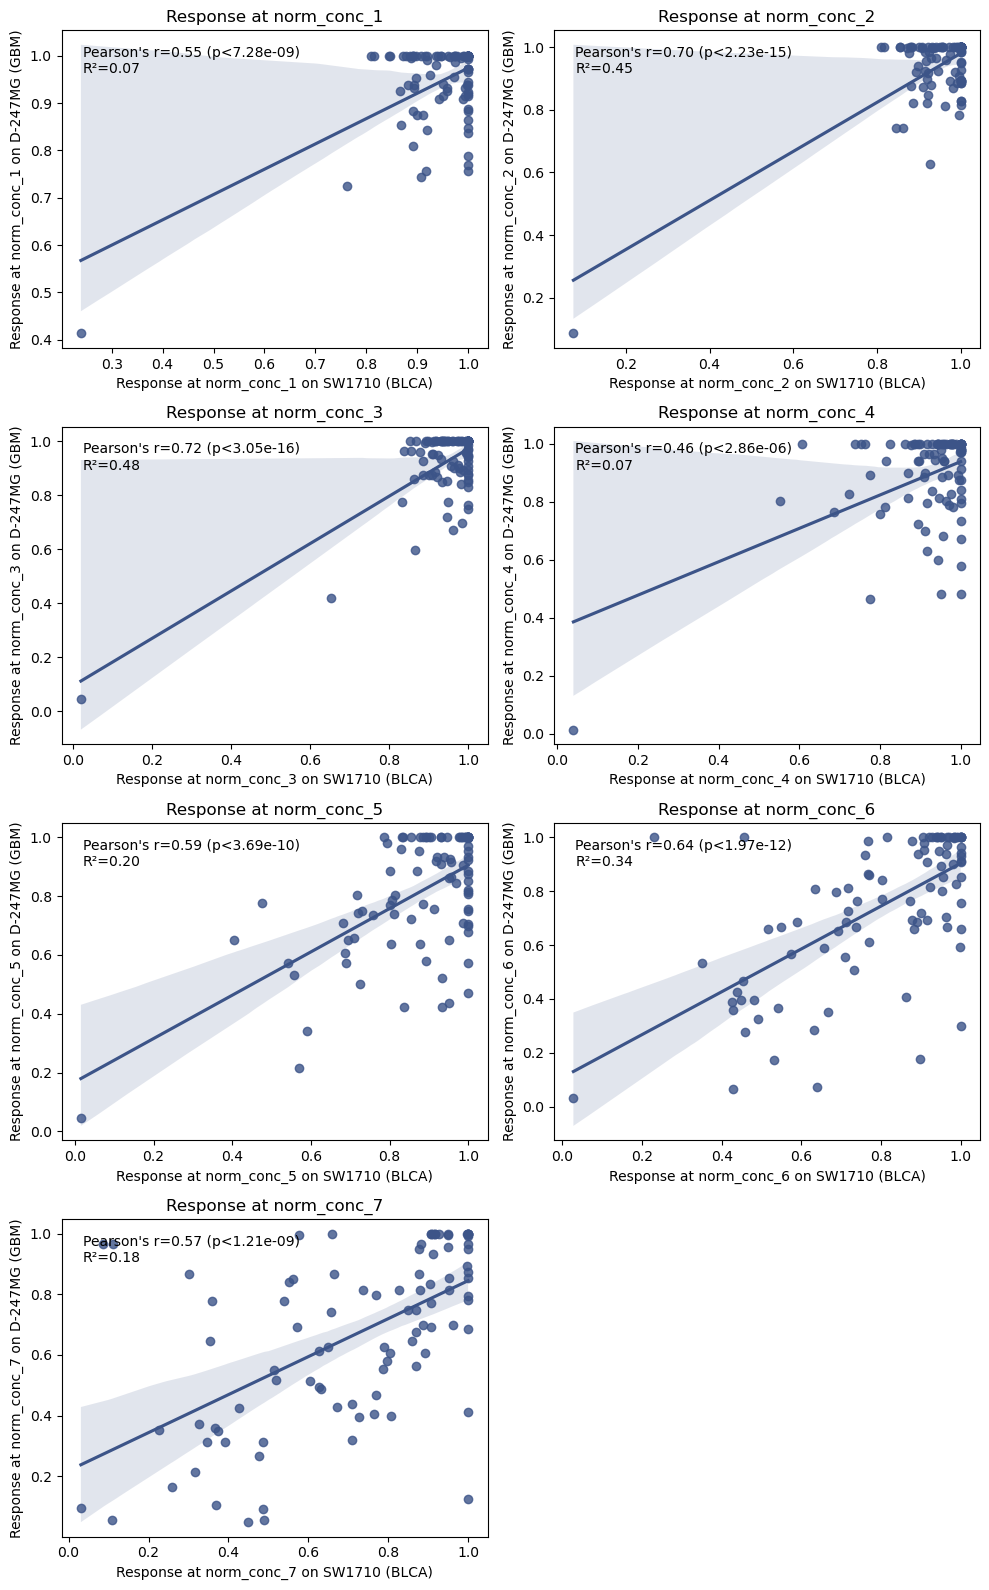

In [4]:
def plot_correlation(BC_curve_df, Gil_curve_df, col_nums, n_rows=4, n_cols=2):
    # Create a figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration
    for ax in axes[len(col_nums):]:
        ax.remove()
    # Iterate over the specified column numbers
    for i, col_num in enumerate(col_nums):
        col_name = f'norm_cells_{col_num}'
        lg_gif_ic50 = Gil_curve_df[col_name].values
        lg_bc_ic50 = BC_curve_df[col_name].values

        # Calculate Pearson's r, p-value and R^2
        r, p_value = pearsonr(lg_gif_ic50, lg_bc_ic50)
        r2 = r2_score(lg_gif_ic50, lg_bc_ic50)

        # Plot on the appropriate subplot
        sns.regplot(x=lg_bc_ic50, y=lg_gif_ic50, ax=axes[i], color="#3C5488FF")

        # Annotate the subplot with Pearson's r and p-value
        axes[i].text(0.05, 0.95, f"Pearson's r={r:.2f} (p<{p_value:.2e})\nR²={r2:.2f}", 
                     ha='left', va='top', transform=axes[i].transAxes, color='black')
        axes[i].set_title(f'Response at norm_conc_{col_num}')
        axes[i].set_xlabel(f'Response at norm_conc_{col_num} on SW1710 (BLCA)')
        axes[i].set_ylabel(f'Response at norm_conc_{col_num} on D-247MG (GBM)')

    # Adjust the layout so the subplots fit into the figure area
    plt.tight_layout()

    # Save the plot if needed
    # plt.savefig('output_filename.png', dpi=300)   
    plt.savefig('/home/yurui/GDSC_2/fitting_curve/Figures/norm_response_corr_two_cls.pdf', bbox_inches='tight',dpi=300, format='pdf')
    plt.savefig('/home/yurui/GDSC_2/fitting_curve/Figures/norm_response_corr_two_cls.png', bbox_inches='tight',dpi=300, format='png')
    # Show the plot
    plt.show()
    
# Example usage:
plot_correlation(BC_curve_df, Gil_curve_df, col_nums=[1,2,3,4,5,6,7])


/home/yurui/anaconda3/envs/drug_response_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yurui/anaconda3/envs/drug_response_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yurui/anaconda3/envs/drug_response_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yurui/anaconda3/envs/drug_response_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

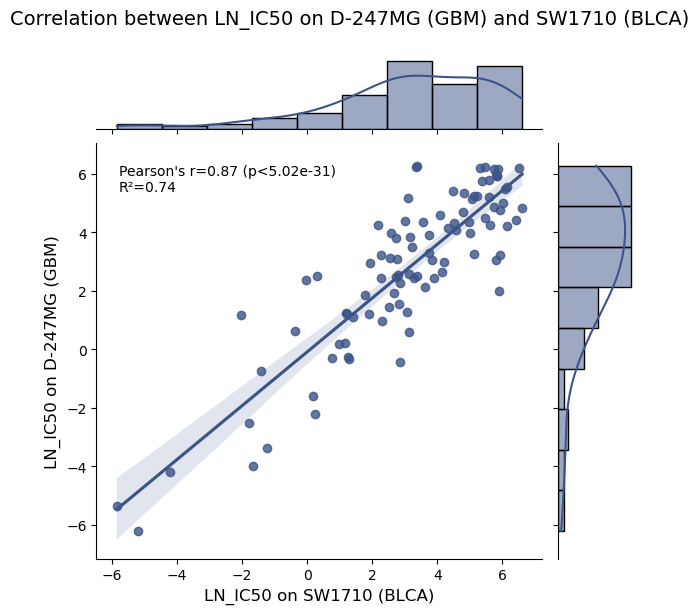

In [5]:
## Keep rows where they share the same drug_id
BC_df = BC_df[BC_df['DRUG_ID'].isin(Gil_df['DRUG_ID'])]
Gil_df = Gil_df[Gil_df['DRUG_ID'].isin(BC_df['DRUG_ID'])]
BC_df= BC_df[BC_df['DRUG_ID'].isin(drug_common)]
Gil_df = Gil_df[Gil_df['DRUG_ID'].isin(drug_common)]
## Take the exponential of the LN_IC50 column
np.exp(BC_df['LN_IC50'])
lg_gif_ic50 = Gil_df.LN_IC50.values
lg_bc_ic50 = BC_df.LN_IC50.values
r, p_value = pearsonr(lg_gif_ic50, lg_bc_ic50)
r2 = r2_score(lg_gif_ic50, lg_bc_ic50)
joint_plot = sns.jointplot(x=lg_bc_ic50, y=lg_gif_ic50, kind='reg', color="#3C5488FF")

# Add Pearson's r and p-value to the plot
joint_plot.ax_joint.text(x=0.05, y=0.95, s=f"Pearson's r={r:.2f} (p<{p_value:.2e})\nR²={r2:.2f}", 
                         ha='left', va='top', transform=joint_plot.ax_joint.transAxes, color='black')
joint_plot.fig.suptitle('Correlation between LN_IC50 on D-247MG (GBM) and SW1710 (BLCA)', fontsize=14)
joint_plot.set_axis_labels('LN_IC50 on SW1710 (BLCA)', 'LN_IC50 on D-247MG (GBM)', fontsize=12)
## Dont show the axis
# joint_plot.ax_joint.axis('off')
# Adjust the figure to prevent the title from being cropped
plt.subplots_adjust(top=0.9)

# Save the plot if needed
# plt.savefig('output_filename.png', dpi=300)
plt.savefig('/home/yurui/GDSC_2/fitting_curve/Figures/LN_IC50_corr_two_cls.pdf', bbox_inches='tight',dpi=300, format='pdf')
plt.savefig('/home/yurui/GDSC_2/fitting_curve/Figures/LN_IC50_corr_two_cls.png', bbox_inches='tight',dpi=300, format='png')
# Show the plot
plt.show()
